In [ ]:
from utils import *
from measures import *
from deep_measures import *

import pickle
from tqdm import tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
frames = load_video_frames("bin/bangbangyouredead_v4-1.mp4")
frames.shape

(14664, 480, 720, 3)

In [3]:
# This proves that video is actually black and white
np.all(frames[0,:,:,0] == frames[0,:,:,2])

True

In [ ]:
# Organizing our metrics and stores
measures = {}
metrics = [# On pure pixel traces
           sum_abs, l1, l2,
           correlation, cosine,
           
           # On population of Pixels
           histogram_diff, ssim, wasserstein,
           
           # On deep features of VGG16s
           perceptual, deep_cosine]

# Making measurements
for method in metrics:
    key = method.__name__
    measures[key] = []
    for i in tqdm(range(len(frames) - 1), desc=key):
        frame_1 = frames[..., 0][i]
        frame_2 = frames[..., 0][i+1]
        measures[key].append(method(frame_1, frame_2))

ssim:  69%|██████▉   | 10170/14663 [03:00<01:19, 56.79it/s]/home/nuttidalab/miniconda3/envs/rudra_pl/lib/python3.12/site-packages/skimage/metrics/_structural_similarity.py:269: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
wasserstein: 100%|██████████| 14663/14663 [17:18<00:00, 14.12it/s]


In [ ]:
with open("bin/measures.pkl", "wb") as f:
    pickle.dump(measures, f)

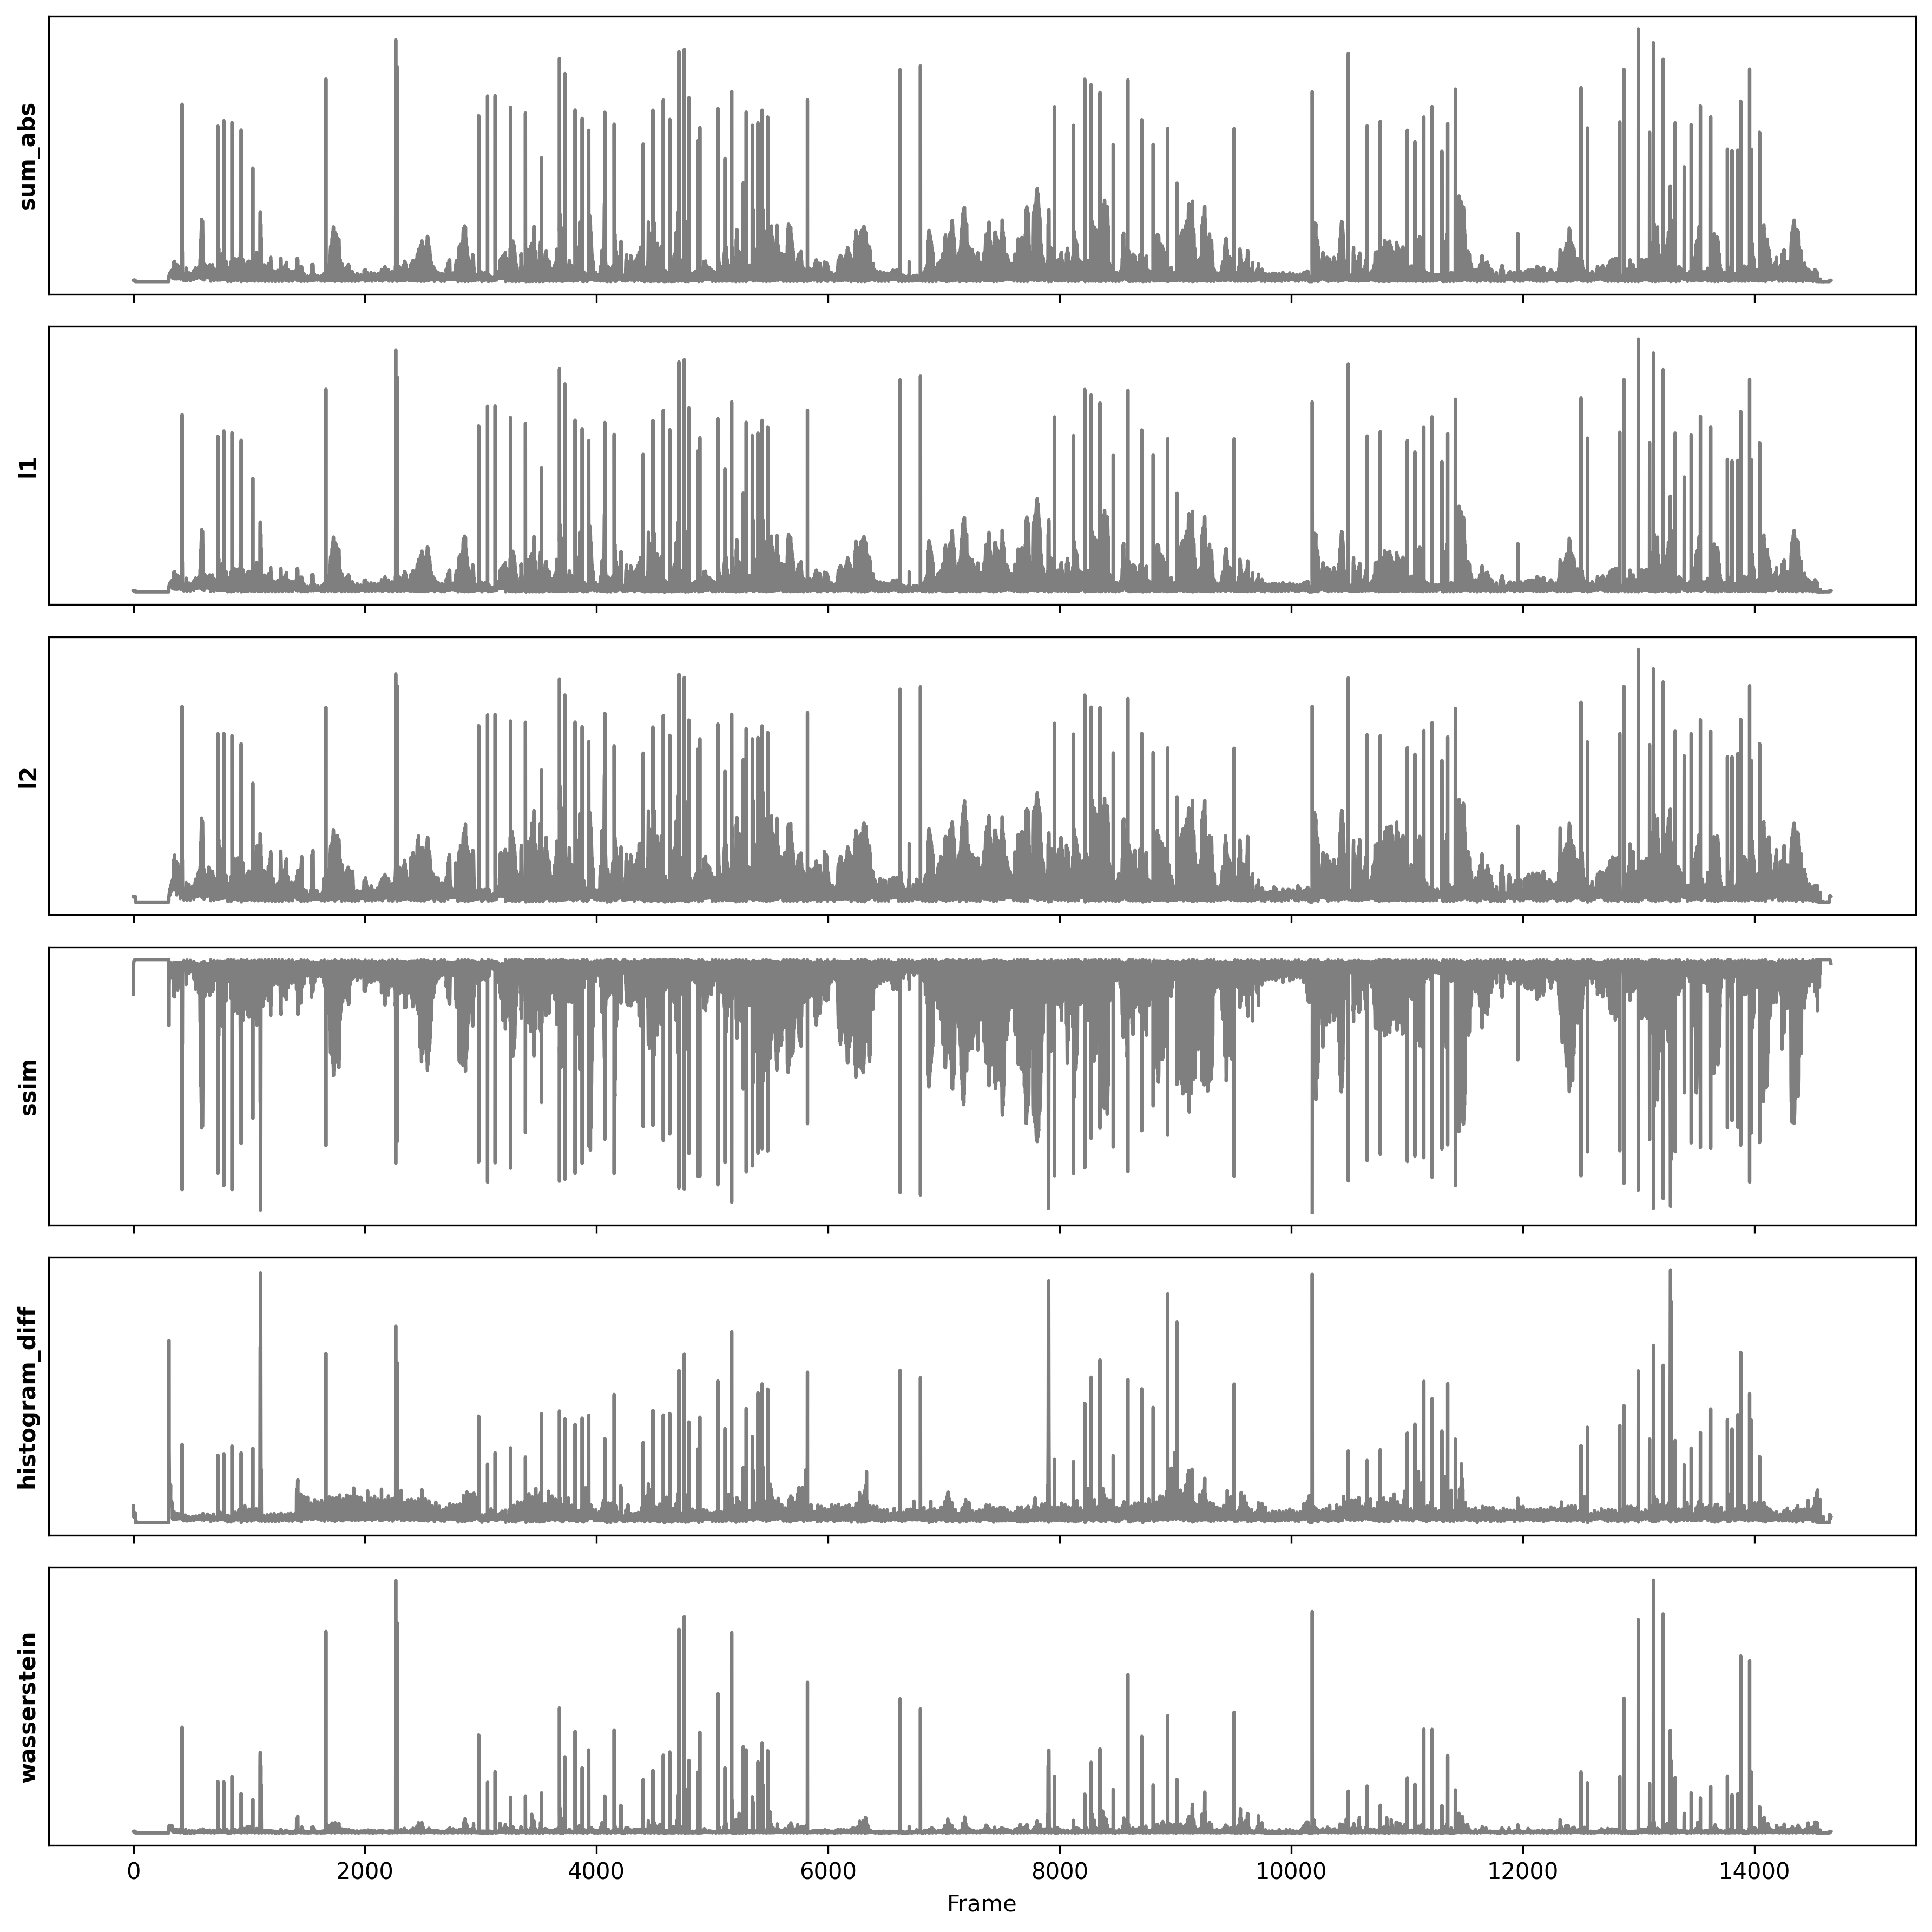

In [5]:
df = pd.DataFrame(measures)

fig, axs = plt.subplots(
    len(df.columns), 
    1, 
    figsize=(12, 2*len(df.columns)), 
    sharex=True, 
    dpi=300
)

for i, key in enumerate(df.columns):
    axs[i].plot(df[key], "k-", alpha=0.5)
    axs[i].set_ylabel(key, weight="bold")
    axs[i].set_yticks([])
    
axs[-1].set_xlabel("Frame")

plt.tight_layout()
plt.show()